<a href="https://colab.research.google.com/github/ScaratP/2025-Machine-Learning-HW/blob/main/11111124%E7%8E%8B%E6%9B%B8%E5%A7%B5ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

缺失值:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
重複值: 1
數值特徵統計:
                 age           bmi      children       charges
count  1.337000e+03  1.337000e+03  1.337000e+03  1.337000e+03
mean  -6.643070e-17 -2.285216e-16  3.852980e-17 -1.009747e-16
std    1.000374e+00  1.000374e+00  1.000374e+00  1.000374e+00
min   -1.511647e+00 -2.411119e+00 -9.092342e-01 -1.004247e+00
25%   -8.705798e-01 -7.171725e-01 -9.092342e-01 -7.048486e-01
50%   -1.582291e-02 -4.320166e-02 -7.944162e-02 -3.215773e-01
75%    8.389340e-01  6.619260e-01  7.503509e-01  2.790883e-01
max    1.764921e+00  3.684136e+00  3.239729e+00  4.170826e+00


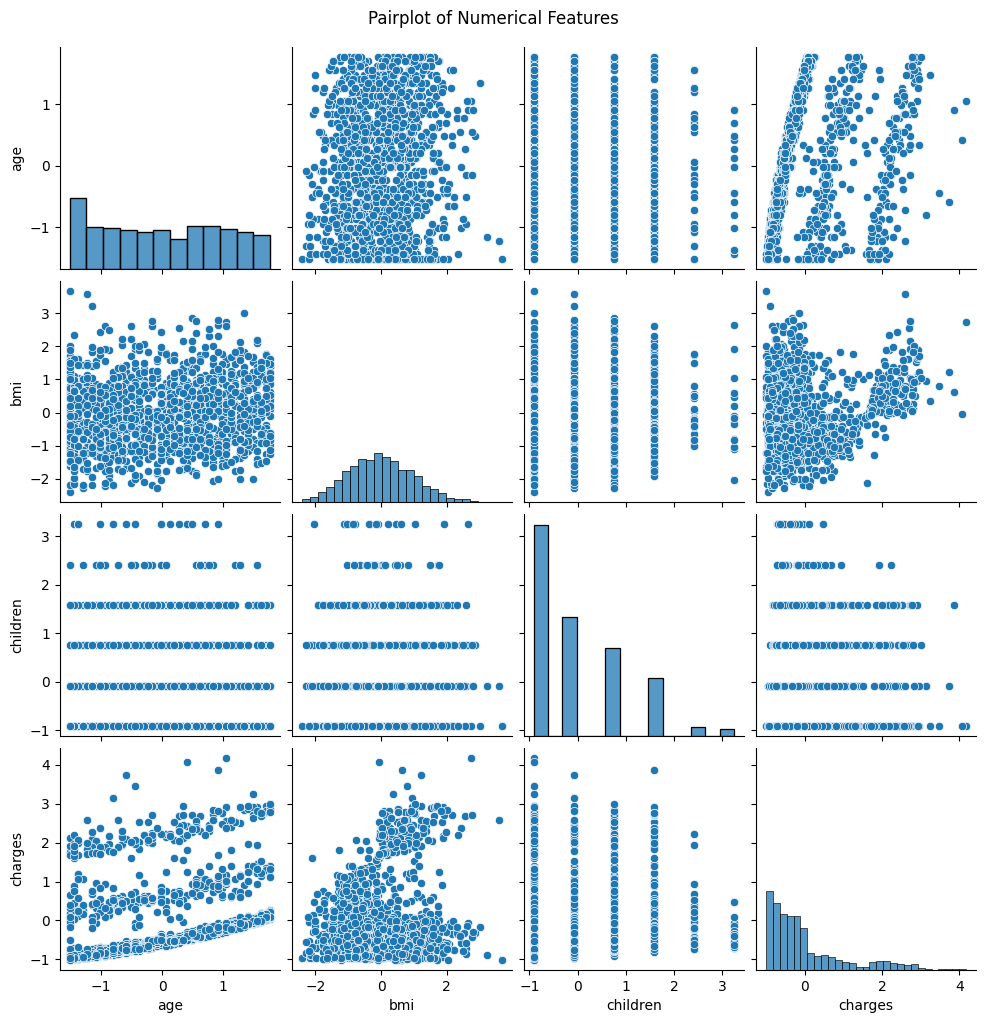

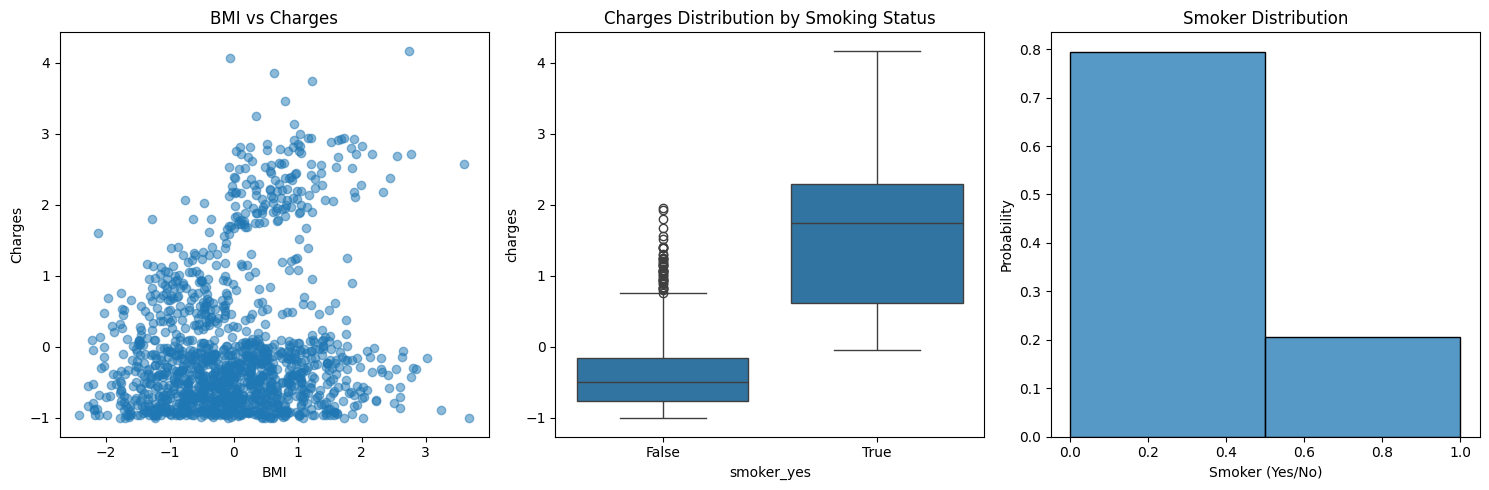

線性回歸性能:
MAE: 0.3445
MSE: 0.2408
R²: 0.8080

隨機森林回歸性能:
MAE: 0.2150
MSE: 0.1485
R²: 0.8816

梯度提升回歸性能:
MAE: 0.2034
MSE: 0.1250
R²: 0.9003

特徵重要性比較:
             Feature  Linear_Coef  RF_Importance  GB_Importance
0               age     0.282270       0.114025       0.107726
1               bmi     0.161110       0.185924       0.178122
2          children     0.052454       0.021282       0.014655
3          sex_male    -0.008967       0.005589       0.000413
4        smoker_yes     1.908156       0.600777       0.664955
5  region_northwest    -0.032970       0.005582       0.000910
6  region_southeast    -0.070519       0.005031       0.000757
7  region_southwest    -0.053551       0.003886       0.000570
8           age_bmi    -0.000484       0.047711       0.019950
9        age_smoker     0.027592       0.010194       0.011940


In [ ]:
# 導入必要的庫
import pandas as pd  # 用於數據處理和分析
import numpy as np  # 用於數值計算
import matplotlib.pyplot as plt  # 用於繪製圖表
import seaborn as sns  # 用於更高級的可視化
from sklearn.model_selection import train_test_split  # 用於數據集分割
from sklearn.linear_model import LinearRegression  # 線性回歸模型
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # 非線性模型
from sklearn.preprocessing import StandardScaler  # 用於標準化數據
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 模型評估指標

# 1. 數據清理和預處理
def load_and_clean_data(file_path):
    """
    載入數據集並進行清理，包括檢查缺失值、重複值，編碼類別變數，標準化數值特徵。
    參數：
        file_path (str): 數據集檔案路徑
    返回：
        df (DataFrame): 處理後的數據框
    """
    # 載入數據集
    df = pd.read_csv(file_path)

    # 檢查缺失值和重複值
    print("缺失值:\n", df.isnull().sum())
    print("重複值:", df.duplicated().sum())

    # 移除重複值
    df = df.drop_duplicates()

    # 對類別變數進行獨熱編碼（One-Hot Encoding），drop_first=True 避免多重共線性
    df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    # 標準化數值特徵（age, bmi, children, charges），使均值為 0，標準差為 1
    scaler = StandardScaler()
    numeric_features = ['age', 'bmi', 'children', 'charges']
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    return df

# 2. 探索性數據分析（EDA）
def exploratory_data_analysis(df):
    """
    進行探索性數據分析，包括生成統計摘要和可視化圖表。
    參數：
        df (DataFrame): 處理後的數據框
    """
    # 生成數值特徵的統計摘要（均值、標準差等）
    print("數值特徵統計:\n", df[['age', 'bmi', 'children', 'charges']].describe())

    # 創建可視化圖表
    # 圖 1：對角線配對圖（Pairplot），展示數值變數的分佈和關係
    sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()

    # 圖 2：包含三個子圖（BMI vs Charges 散點圖、吸煙狀態的費用分佈箱型圖、吸煙狀態直方圖）
    plt.figure(figsize=(15, 5))

    # 子圖 1：BMI vs Charges 散點圖
    plt.subplot(131)
    plt.scatter(df['bmi'], df['charges'], alpha=0.5)
    plt.xlabel('BMI')
    plt.ylabel('Charges')
    plt.title('BMI vs Charges')

    # 子圖 2：吸煙狀態的費用分佈箱型圖
    plt.subplot(132)
    sns.boxplot(x='smoker_yes', y='charges', data=df)
    plt.title('Charges Distribution by Smoking Status')

    # 子圖 3：吸煙狀態直方圖
    plt.subplot(133)
    sns.histplot(df['smoker_yes'], bins=2, stat='probability')
    plt.title('Smoker Distribution')
    plt.xlabel('Smoker (Yes/No)')

    plt.tight_layout()
    plt.show()

# 3. 特徵工程
def feature_engineering(df):
    """
    添加交互特徵以捕捉變數間的潛在關係。
    參數：
        df (DataFrame): 處理後的數據框
    返回：
        df (DataFrame): 包含新特徵的數據框
    """
    # 創建交互特徵：age * bmi
    df['age_bmi'] = df['age'] * df['bmi']
    # 創建交互特徵：age * smoker_yes，檢查吸煙對不同年齡的影響
    df['age_smoker'] = df['age'] * df['smoker_yes']

    return df

# 4. 訓練和評估線性回歸模型
def train_linear_regression(df):
    """
    訓練線性回歸模型並評估其性能。
    參數：
        df (DataFrame): 處理後的數據框
    返回：
        X_train, X_test, y_train, y_test: 訓練和測試數據
        model: 訓練好的線性回歸模型
    """
    # 分離特徵 (X) 和目標變數 (y)
    X = df.drop('charges', axis=1)
    y = df['charges']

    # 將數據分為訓練集 (80%) 和測試集 (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 初始化並訓練線性回歸模型
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = model.predict(X_test)

    # 計算性能指標
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # 輸出性能結果
    print("線性回歸性能:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")

    return X_train, X_test, y_train, y_test, model

# 5. 訓練和評估非線性模型（隨機森林和梯度提升）
def train_nonlinear_models(X_train, X_test, y_train, y_test):
    """
    訓練隨機森林和梯度提升回歸模型，並評估其性能。
    參數：
        X_train, X_test, y_train, y_test: 訓練和測試數據
    返回：
        rf_model, gb_model: 訓練好的隨機森林和梯度提升模型
    """
    # 初始化隨機森林回歸模型（100 棵樹）
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # 初始化梯度提升回歸模型（100 棵樹）
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)

    # 計算隨機森林的性能指標
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)

    # 計算梯度提升的性能指標
    gb_mae = mean_absolute_error(y_test, gb_pred)
    gb_mse = mean_squared_error(y_test, gb_pred)
    gb_r2 = r2_score(y_test, gb_pred)

    # 輸出性能結果
    print("\n隨機森林回歸性能:")
    print(f"MAE: {rf_mae:.4f}")
    print(f"MSE: {rf_mse:.4f}")
    print(f"R²: {rf_r2:.4f}")

    print("\n梯度提升回歸性能:")
    print(f"MAE: {gb_mae:.4f}")
    print(f"MSE: {gb_mse:.4f}")
    print(f"R²: {gb_r2:.4f}")

    return rf_model, gb_model

# 6. 主程式
def main():
    """
    主程式，執行數據處理、EDA、特徵工程、模型訓練和評估。
    """
    # 載入並清理數據
    df = load_and_clean_data('/content/insurance[1].csv')

    # 進行探索性數據分析
    exploratory_data_analysis(df)

    # 特徵工程：添加交互特徵
    df = feature_engineering(df)

    # 訓練線性回歸模型
    X_train, X_test, y_train, y_test, lin_model = train_linear_regression(df)

    # 訓練非線性模型（隨機森林和梯度提升）
    rf_model, gb_model = train_nonlinear_models(X_train, X_test, y_train, y_test)

    # 特徵重要性比較
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Linear_Coef': lin_model.coef_,  # 線性回歸係數
        'RF_Importance': rf_model.feature_importances_,  # 隨機森林特徵重要性
        'GB_Importance': gb_model.feature_importances_  # 梯度提升特徵重要性
    })
    print("\n特徵重要性比較:\n", feature_importance)

if __name__ == "__main__":
    main()

In [ ]:
# 導入必要的庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. 數據清理和預處理
def load_and_clean_data(file_path):
    # a) 載入數據並檢查缺失值和重複值
    df = pd.read_csv(file_path)
    print("缺失值:\n", df.isnull().sum())
    print("重複值:", df.duplicated().sum())
    df = df.drop_duplicates()

    # b) 對類別變數進行編碼
    df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    # c) 標準化數值特徵
    scaler = StandardScaler()
    numeric_features = ['age', 'bmi', 'children', 'charges']
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    return df

In [ ]:
# 2. 探索性數據分析
def exploratory_data_analysis(df):
    # a) 摘要統計量
    print("數值特徵統計:\n", df[['age', 'bmi', 'children', 'charges']].describe())

    # b) 可視化
    plt.figure(figsize=(15, 5))

    # 散點圖：bmi vs charges
    plt.subplot(131)
    plt.scatter(df['bmi'], df['charges'])
    plt.xlabel('BMI')
    plt.ylabel('Charges')
    plt.title('BMI vs Charges')

    # 箱型圖：smoker vs charges
    plt.subplot(132)
    sns.boxplot(x='smoker_yes', y='charges', data=df)
    plt.title('Charges Distribution by Smoking Status')

    # 對角線配對圖
    plt.subplot(133)
    sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
    plt.show()

In [ ]:
# 3. 建立線性回歸模型
def train_linear_regression(df):
    X = df.drop('charges', axis=1)
    y = df['charges']

    # 分割數據
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練模型
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 預測並評估
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("線性回歸性能:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")

    return X_train, X_test, y_train, y_test, model

In [ ]:
# 4. 特徵工程
def feature_engineering(df):
    # 添加交互特徵
    df['age_bmi'] = df['age'] * df['bmi']
    df['age_smoker'] = df['age'] * df['smoker_yes']

    return df

In [ ]:
# 5. 正則化模型
def train_regularized_models(X_train, X_test, y_train, y_test):
    # 脊回歸
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)

    # 套索回歸
    lasso = Lasso(alpha=1.0)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)

    # 評估
    print("\n脊回歸性能:")
    print(f"MAE: {mean_absolute_error(y_test, ridge_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, ridge_pred):.4f}")
    print(f"R²: {r2_score(y_test, ridge_pred):.4f}")

    print("\n套索回歸性能:")
    print(f"MAE: {mean_absolute_error(y_test, lasso_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, lasso_pred):.4f}")
    print(f"R²: {r2_score(y_test, lasso_pred):.4f}")

    return ridge, lasso

In [ ]:
# 導入額外的庫
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 非線性回歸模型函數
def train_nonlinear_models(X_train, X_test, y_train, y_test):
    # 隨機森林回歸
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # 梯度提升回歸
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)

    # 評估隨機森林
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)

    # 評估梯度提升
    gb_mae = mean_absolute_error(y_test, gb_pred)
    gb_mse = mean_squared_error(y_test, gb_pred)
    gb_r2 = r2_score(y_test, gb_pred)

    print("\n隨機森林回歸性能:")
    print(f"MAE: {rf_mae:.4f}")
    print(f"MSE: {rf_mse:.4f}")
    print(f"R²: {rf_r2:.4f}")

    print("\n梯度提升回歸性能:")
    print(f"MAE: {gb_mae:.4f}")
    print(f"MSE: {gb_mse:.4f}")
    print(f"R²: {gb_r2:.4f}")

    return rf_model, gb_model

缺失值:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
重複值: 1
數值特徵統計:
                 age           bmi      children       charges
count  1.337000e+03  1.337000e+03  1.337000e+03  1.337000e+03
mean  -6.643070e-17 -2.285216e-16  3.852980e-17 -1.009747e-16
std    1.000374e+00  1.000374e+00  1.000374e+00  1.000374e+00
min   -1.511647e+00 -2.411119e+00 -9.092342e-01 -1.004247e+00
25%   -8.705798e-01 -7.171725e-01 -9.092342e-01 -7.048486e-01
50%   -1.582291e-02 -4.320166e-02 -7.944162e-02 -3.215773e-01
75%    8.389340e-01  6.619260e-01  7.503509e-01  2.790883e-01
max    1.764921e+00  3.684136e+00  3.239729e+00  4.170826e+00


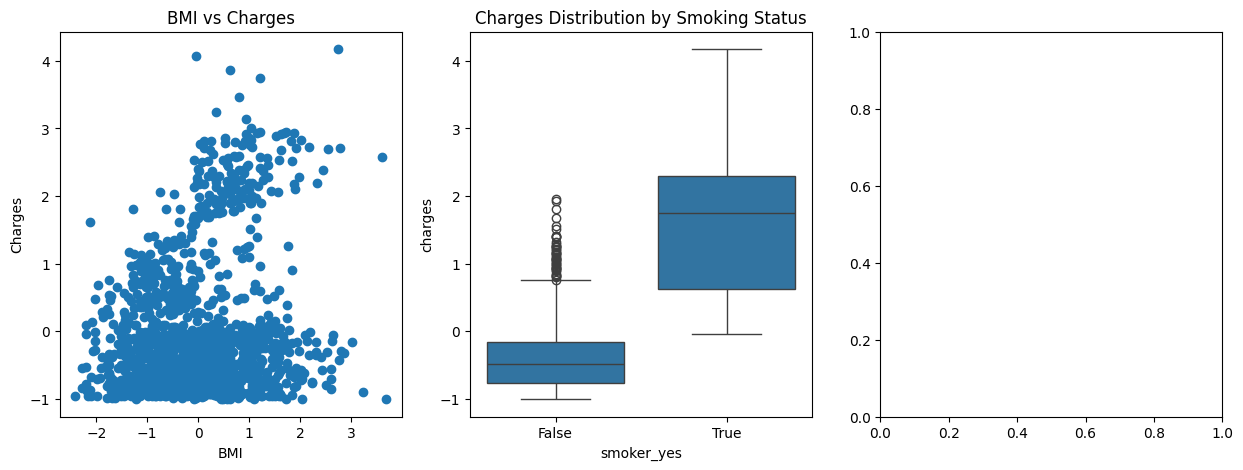

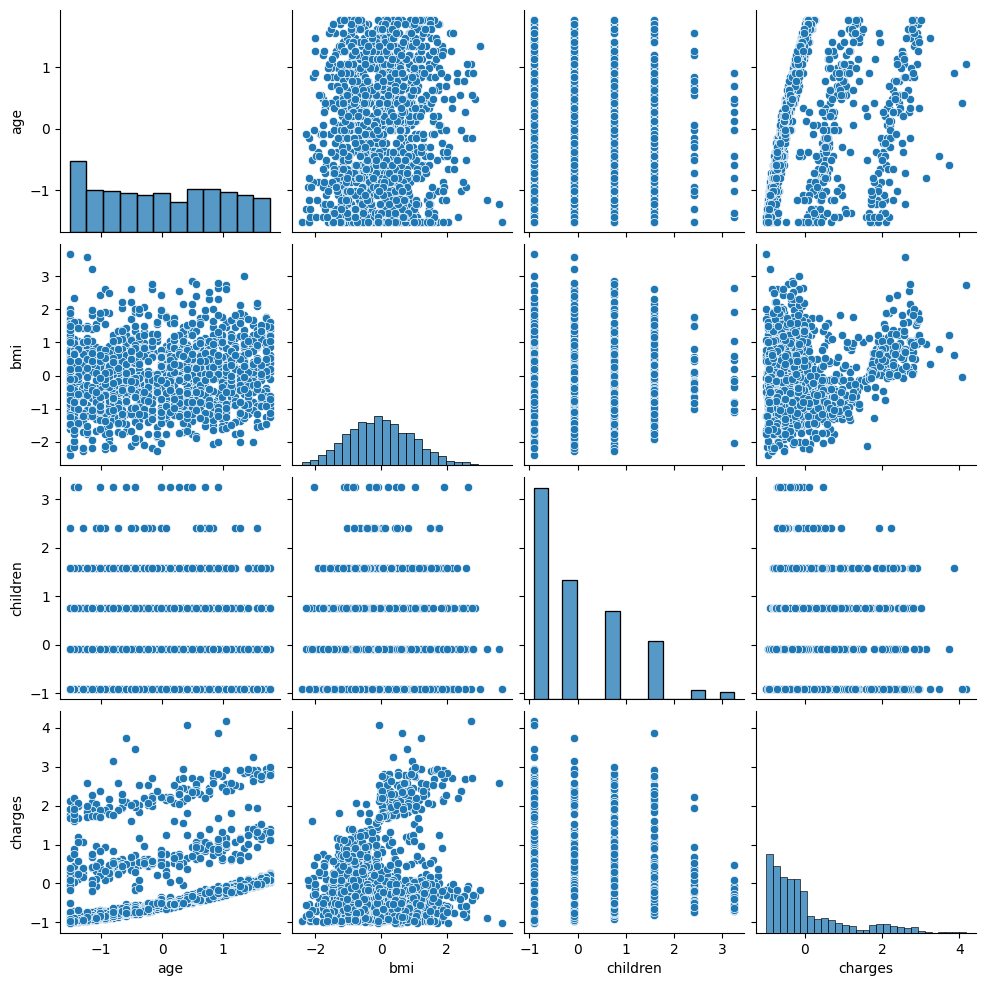

線性回歸性能:
MAE: 0.3445
MSE: 0.2408
R²: 0.8080

隨機森林回歸性能:
MAE: 0.2150
MSE: 0.1485
R²: 0.8816

梯度提升回歸性能:
MAE: 0.2034
MSE: 0.1250
R²: 0.9003

特徵重要性比較:
             Feature  Linear_Coef  RF_Importance  GB_Importance
0               age     0.282270       0.114025       0.107726
1               bmi     0.161110       0.185924       0.178122
2          children     0.052454       0.021282       0.014655
3          sex_male    -0.008967       0.005589       0.000413
4        smoker_yes     1.908156       0.600777       0.664955
5  region_northwest    -0.032970       0.005582       0.000910
6  region_southeast    -0.070519       0.005031       0.000757
7  region_southwest    -0.053551       0.003886       0.000570
8           age_bmi    -0.000484       0.047711       0.019950
9        age_smoker     0.027592       0.010194       0.011940


In [ ]:
# 更新主程式以包含非線性模型
def main():
    # 假設數據集檔案名為 'insurance.csv'
    df = load_and_clean_data('/content/insurance[1].csv')

    # EDA（保持不變）
    exploratory_data_analysis(df)

    # 特徵工程
    df_enhanced = feature_engineering(df)
    X = df_enhanced.drop('charges', axis=1)
    y = df_enhanced['charges']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 線性回歸（作為基準）
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    lin_pred = lin_model.predict(X_test)
    print("線性回歸性能:")
    print(f"MAE: {mean_absolute_error(y_test, lin_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, lin_pred):.4f}")
    print(f"R²: {r2_score(y_test, lin_pred):.4f}")

    # 非線性模型
    rf_model, gb_model = train_nonlinear_models(X_train, X_test, y_train, y_test)

    # 特徵重要性比較
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Linear_Coef': lin_model.coef_,
        'RF_Importance': rf_model.feature_importances_,
        'GB_Importance': gb_model.feature_importances_
    })
    print("\n特徵重要性比較:\n", feature_importance)

if __name__ == "__main__":
    main()